# Establish the relationship between S&P 500 and DXY

#### In this current task, data for two prices indices: S&P 500 (SPX) and US Dollars index (DXY) have been collected from the year 1927 up to the year 1979 with their subsequent variations. Before diving in any data analysis, let's provide a brief definition of these aforementioned indices to get a sense of familiarity.
  
#### The S&P 500, or simply the S&P, is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices, and many consider it to be one of the best representations of the U.S. stock market.

#### The U.S. Dollar Index (USDX, DXY, DX) is an index (or measure) of the value of the United States dollar relative to a basket of foreign currencies, often referred to as a basket of U.S. trade partners' currencies. The Index goes up when the U.S. dollar gains "strength" (value) when compared to other currencies. The index is designed, maintained, and published by ICE (Intercontinental Exchange, Inc.), with the name "U.S. Dollar Index" a registered trademark. It is a weighted geometric mean of the dollar's value relative to following select currencies: 
#### Euro (EUR), 57.6% weight
#### Japanese yen (JPY) 13.6% weight
#### Pound sterling (GBP), 11.9% weight
#### Canadian dollar (CAD), 9.1% weight
#### Swedish krona (SEK), 4.2% weight
#### Swiss franc (CHF) 3.6% weight

#### As noticed in the definitions given above, the two indices are highly related to time, which give them a special characteristic known as time-series data. Whith that being said, let's get sart started...

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Import the data of the stock market index

path = r'C:\Users\HP\Desktop\Skillshare\IBM Data Sciences\Data Analysis with Python\SPX.xlsx'
df_SPX = pd.read_excel(path)
df_SPX.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-29,2918.46,2954.86,2912.16,2939.51,NaN,NaN
1,2020-04-28,2909.96,2921.15,2860.71,2863.39,NaN,NaN
2,2020-04-27,2854.65,2887.72,2852.89,2878.48,NaN,NaN
3,2020-04-24,2812.64,2842.71,2791.76,2836.74,NaN,NaN
4,2020-04-23,2810.42,2844.90,2794.26,2797.80,NaN,NaN
5,2020-04-22,2787.89,2815.10,2775.95,2799.31,NaN,NaN
6,2020-04-21,2784.81,2785.54,2727.10,2736.56,NaN,NaN
7,2020-04-20,2845.62,2868.98,2820.43,2823.16,NaN,NaN
8,2020-04-17,2842.43,2879.22,2830.88,2874.56,NaN,NaN
9,2020-04-16,2799.34,2806.51,2764.32,2799.55,NaN,NaN


In [3]:
# import the data of the US Dollar index
path2 = r'C:\Users\HP\Desktop\Skillshare\IBM Data Sciences\Data Analysis with Python\DXY.xlsx'
df_DXY = pd.read_excel(path2)
df_DXY.head(10)

,Date,Price,Open,High,Low,Vol.
0,2020-04-29,99.49,99.87,99.88,99.47,-
1,2020-04-28,99.87,100.09,100.20,99.45,-
2,2020-04-27,100.09,100.24,100.32,99.83,-
3,2020-04-24,100.29,100.50,100.87,100.19,-
4,2020-04-23,100.52,100.48,100.68,100.06,-
5,2020-04-22,100.48,100.20,100.49,99.90,-
6,2020-04-21,100.20,99.95,100.47,99.95,-
7,2020-04-20,99.95,99.83,100.07,99.65,NaN
8,2020-04-19,99.84,99.71,99.84,99.71,NaN
9,2020-04-17,99.72,99.86,100.29,99.62,NaN


### Data Wrangling

In [4]:
# let's drop the 'Adj Close' and 'Volume' colums that do not seem relevant to our analysis
df_SPX.drop(["Adj Close", "Volume"], axis=1, inplace=True)
df_SPX.head(5)

,Date,Open,High,Low,Close
0,2020-04-29,2918.46,2954.86,2912.16,2939.51
1,2020-04-28,2909.96,2921.15,2860.71,2863.39
2,2020-04-27,2854.65,2887.72,2852.89,2878.48
3,2020-04-24,2812.64,2842.71,2791.76,2836.74
4,2020-04-23,2810.42,2844.90,2794.26,2797.80


In [5]:
# Add a column called 'variations' which is the difference between the values in the High and Low columns
df_SPX['Variations_SPX'] = df_SPX['High']-df_SPX['Low']
df_SPX.head(5)


,Date,Open,High,Low,Close,Variations_SPX
0,2020-04-29,2918.46,2954.86,2912.16,2939.51,42.70
1,2020-04-28,2909.96,2921.15,2860.71,2863.39,60.44
2,2020-04-27,2854.65,2887.72,2852.89,2878.48,34.83
3,2020-04-24,2812.64,2842.71,2791.76,2836.74,50.95
4,2020-04-23,2810.42,2844.90,2794.26,2797.80,50.64


In [6]:
# Do the same as previously for the US dollar Index data
df_DXY['Variations_DXY']=df_DXY['High']-df_DXY['Low']

# drop the vol. column that seems not useful for the analysis
df_DXY.drop("Vol.", axis=1, inplace=True)
df_DXY.head(5)

,Date,Price,Open,High,Low,Variations_DXY
0,2020-04-29,99.49,99.87,99.88,99.47,0.41
1,2020-04-28,99.87,100.09,100.20,99.45,0.75
2,2020-04-27,100.09,100.24,100.32,99.83,0.49
3,2020-04-24,100.29,100.50,100.87,100.19,0.68
4,2020-04-23,100.52,100.48,100.68,100.06,0.62


In [7]:
# check whether there are missing values in the SPX data
missing_data=df_SPX.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Date
False    23191
Name: Date, dtype: int64

Open
False    23191
Name: Open, dtype: int64

High
False    23191
Name: High, dtype: int64

Low
False    23191
Name: Low, dtype: int64

Close
False    23191
Name: Close, dtype: int64

Variations_SPX
False    23191
Name: Variations_SPX, dtype: int64



In [8]:
# Do the same for the DXY data 
missing_data1 = df_DXY.isnull() 
for column in missing_data1.columns.values.tolist():
    print(column)
    print (missing_data1[column].value_counts())
    print("")

Date
False    10417
Name: Date, dtype: int64

Price
False    10417
Name: Price, dtype: int64

Open
False    10417
Name: Open, dtype: int64

High
False    10417
Name: High, dtype: int64

Low
False    10417
Name: Low, dtype: int64

Variations_DXY
False    10417
Name: Variations_DXY, dtype: int64



The results show that there are no missing values in both data sets. Then we move ahead

### Exploratory Data Analysis

In [9]:
# Determine the dimension of the SPX data set
df_SPX.shape

(23191, 6)

In [10]:
# Determine the dimension of the DXY data set
df_DXY.shape

(10417, 6)

In [11]:
# let's grab some main statistics of the SPX data set
print(round(df_SPX.describe(),2))

           Open      High       Low     Close  Variations_SPX
count  23191.00  23191.00  23191.00  23191.00        23191.00
mean     471.16    473.92    468.23    471.26            5.69
std      697.72    701.40    693.71    697.82           10.81
min        4.40      4.40      4.40      4.40            0.00
25%       23.75     23.75     23.75     23.75            0.00
50%       99.11     99.95     98.31     99.11            1.54
75%      785.60    793.09    777.54    785.96            6.73
max     3380.45   3393.52   3378.83   3386.15          218.96


In [12]:
# let's grab some main statistics of theDXY data set
print(round(df_DXY.describe(),2))

          Price      Open      High       Low  Variations_DXY
count  10417.00  10417.00  10417.00  10417.00        10417.00
mean      94.91     95.98     96.26     95.71            0.55
std        0.59     15.50     15.45     15.55            0.39
min       93.91     71.33     71.69     70.70            0.00
25%       94.80     85.32     85.60     85.11            0.32
50%       94.80     93.57     93.86     93.24            0.51
75%       94.80    100.48    100.82    100.12            0.75
max      102.99    164.72    164.72    164.72            3.72


The standard deviation of both data set varies a great deal. The ranges between min and max values are considerable. As a regression analysis should be performed, normalization will be a good thing to do. The variables 'open', 'Variations_SPX', 'Price', 'Variations_DXY' are normalized since they will be used to perform the regression analysis. Meanwhile the data dimension of both data sets should be properly adjusted

In [13]:
# Normalize selected variables
df_SPX['Open_N']=df_SPX['Open']/df_SPX['Open'].max()
df_SPX['Variations_SPX_N']=df_SPX['Variations_SPX']/df_SPX['Variations_SPX'].max()
df_DXY['Price_N']=df_DXY['Price']/df_DXY['Price'].max()
df_DXY['Variations_DXY_N']=df_DXY['Variations_DXY']/df_DXY['Variations_DXY'].max()

In [14]:
# Adjust the dimension of the SPX data since they have more rows than the other
df_SPX_Adj = df_SPX.head(10417)
df_SPX_Adj.shape

(10417, 8)

In [15]:
# Rename the columns of the df_SPX_Adj dataframe to avoid confusion
df_SPX_Adj.rename(columns={'Date':'DateS','Open':'OpenS','High':'HighS','Low':'LowS','Close':'CloseS'}, inplace=True)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Now both data sets have the same number of rows.

In [16]:
## Combine the two data sets horizontally to ease manipulation of all variables
df = pd.concat([df_SPX_Adj, df_DXY], axis=1)
round(df,2)

,DateS,OpenS,HighS,LowS,CloseS,Variations_SPX,Open_N,Variations_SPX_N,Date,Price,Open,High,Low,Variations_DXY,Price_N,Variations_DXY_N
0,2020-04-29,2918.46,2954.86,2912.16,2939.51,42.70,0.86,0.20,2020-04-29,99.49,99.87,99.88,99.47,0.41,0.97,0.11
1,2020-04-28,2909.96,2921.15,2860.71,2863.39,60.44,0.86,0.28,2020-04-28,99.87,100.09,100.20,99.45,0.75,0.97,0.20
2,2020-04-27,2854.65,2887.72,2852.89,2878.48,34.83,0.84,0.16,2020-04-27,100.09,100.24,100.32,99.83,0.49,0.97,0.13
3,2020-04-24,2812.64,2842.71,2791.76,2836.74,50.95,0.83,0.23,2020-04-24,100.29,100.50,100.87,100.19,0.68,0.97,0.18
4,2020-04-23,2810.42,2844.90,2794.26,2797.80,50.64,0.83,0.23,2020-04-23,100.52,100.48,100.68,100.06,0.62,0.98,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,1979-01-15,99.93,101.13,99.58,100.69,1.55,0.03,0.01,1980-01-02,94.80,85.32,85.32,85.32,0.00,0.92,0.00
10413,1979-01-12,99.32,100.91,99.32,99.93,1.59,0.03,0.01,1979-12-31,94.80,85.82,85.82,85.82,0.00,0.92,0.00
10414,1979-01-11,98.77,99.41,97.95,99.10,1.46,0.03,0.01,1979-12-28,94.80,85.81,85.81,85.81,0.00,0.92,0.00
10415,1979-01-10,99.33,99.75,98.28,98.77,1.47,0.03,0.01,1979-12-27,94.80,85.51,85.51,85.51,0.00,0.92,0.00


In [17]:
# let's calculate the pearson correlation and the p-value between the 'Open_N' and 'Price_N' variables
pearson_coef, p_value = stats.pearsonr(df['Open_N'], df['Price_N'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.4605373946755641  with a P-value of P = 0.0


In [18]:
# let's calculate the pearson correlation and the p-value between the 'Variations_SPX_N' and 'Variations_DXY_N' variables
pearson_coef, p_value = stats.pearsonr(df['Variations_SPX_N'], df['Variations_DXY_N'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.2836453061661588  with a P-value of P = 5.584924897344177e-192


In both cases the correlation coefficient is quite low. 

In [24]:
# set 'Date' as the index of the SPX dataframe
df_SPX.set_index('Date', inplace=True)
df_SPX

,Open,High,Low,Close,Variations_SPX,Open_N,Variations_SPX_N
Date,,,,,,,
2020-04-29,2918.460000,2954.860000,2912.160000,2939.510000,42.70,0.863335,0.195013
2020-04-28,2909.960000,2921.150000,2860.710000,2863.390000,60.44,0.860820,0.276032
2020-04-27,2854.650000,2887.720000,2852.890000,2878.480000,34.83,0.844459,0.159070
2020-04-24,2812.640000,2842.710000,2791.760000,2836.740000,50.95,0.832031,0.232691
2020-04-23,2810.420000,2844.900000,2794.260000,2797.800000,50.64,0.831375,0.231275
...,...,...,...,...,...,...,...
1928-01-06,17.660000,17.660000,17.660000,17.660000,0.00,0.005224,0.000000
1928-01-05,17.549999,17.549999,17.549999,17.549999,0.00,0.005192,0.000000
1928-01-04,17.719999,17.719999,17.719999,17.719999,0.00,0.005242,0.000000


In [25]:
SPX = df_SPX['Open']
SPX

Date
2020-04-29    2918.460000
2020-04-28    2909.960000
2020-04-27    2854.650000
2020-04-24    2812.640000
2020-04-23    2810.420000
                 ...     
1928-01-06      17.660000
1928-01-05      17.549999
1928-01-04      17.719999
1928-01-03      17.760000
1927-12-30      17.660000
Name: Open, Length: 23191, dtype: float64

let's plot the SPX data to visualize the time series

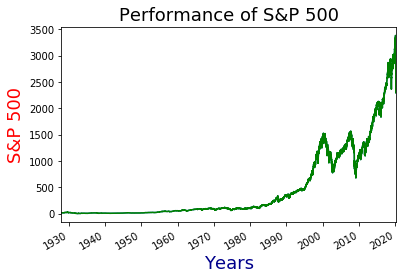

In [35]:
SPX.plot()
SPX.plot(kind='line', color="green")

plt.title('Performance of S&P 500', color="black", fontsize=18)
plt.ylabel('S&P 500', color="red",fontsize=18)
plt.xlabel('Years', color="darkblue",fontsize=18)


plt.show() 

Let's visualize graphically the relationship between SPX and DYX

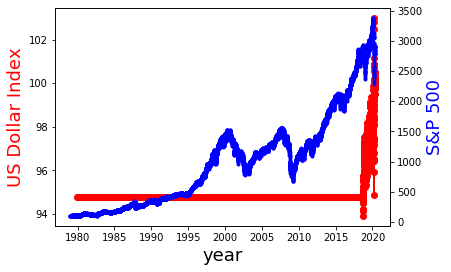

In [29]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df['Date'], df['Price'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=18)
# set y-axis label
ax.set_ylabel("US Dollar Index",color="red",fontsize=18)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df['DateS'], df['OpenS'],color="blue",marker=".")
ax2.set_ylabel("S&P 500",color="blue",fontsize=18)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')
plt.show()